In [1]:
%matplotlib notebook

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import h5py

In [8]:
merged_data_file_path = 'data/20231101_merged_i_syn_DC_offset_data.hdf5'

vm_traces, ramp_mean, ramp_std, firing_rate_mean, firing_rate_std, i_syn_mean, i_syn_std = {}, {}, {}, {}, {}, {}, {}
i_syn_types = ['i_GABA', 'i_AMPA', 'i_NMDA']

In [9]:
with h5py.File(merged_data_file_path) as f:
    first_model = next(iter(f.values()))
    first_trial = next(iter(first_model.values()))
    rec_t = first_trial['rec_t'][:]
    stim_t = first_trial['stim_t'][:]
    for model_name, trials in f.items():
        vm_traces[model_name] = []
        ramp_list = []
        firing_rate_list = []
        i_syn_mean[model_name] = {}
        i_syn_std[model_name] = {}
        i_syn_list_dict = {}
        for syn_type in i_syn_types:
            i_syn_list_dict[syn_type] = []
        for trial in trials.values():
            vm_traces[model_name].append(trial['vm'][:])
            ramp_list.append(trial['ramp'][:])
            firing_rate_list.append(trial['firing_rate'][:])
            for syn_type in i_syn_types:
                i_syn_list_dict[syn_type].append(trial[syn_type][:])
        ramp_mean[model_name] = np.mean(ramp_list, axis=0)
        ramp_std[model_name] = np.std(ramp_list, axis=0)
        firing_rate_mean[model_name] = np.mean(firing_rate_list, axis=0)
        firing_rate_std[model_name] = np.std(firing_rate_list, axis=0)
        for syn_type in i_syn_types:
            i_syn_mean[model_name][syn_type] = np.mean(i_syn_list_dict[syn_type], axis=0)
            i_syn_std[model_name][syn_type] = np.std(i_syn_list_dict[syn_type], axis=0)

<IPython.core.display.Javascript object>


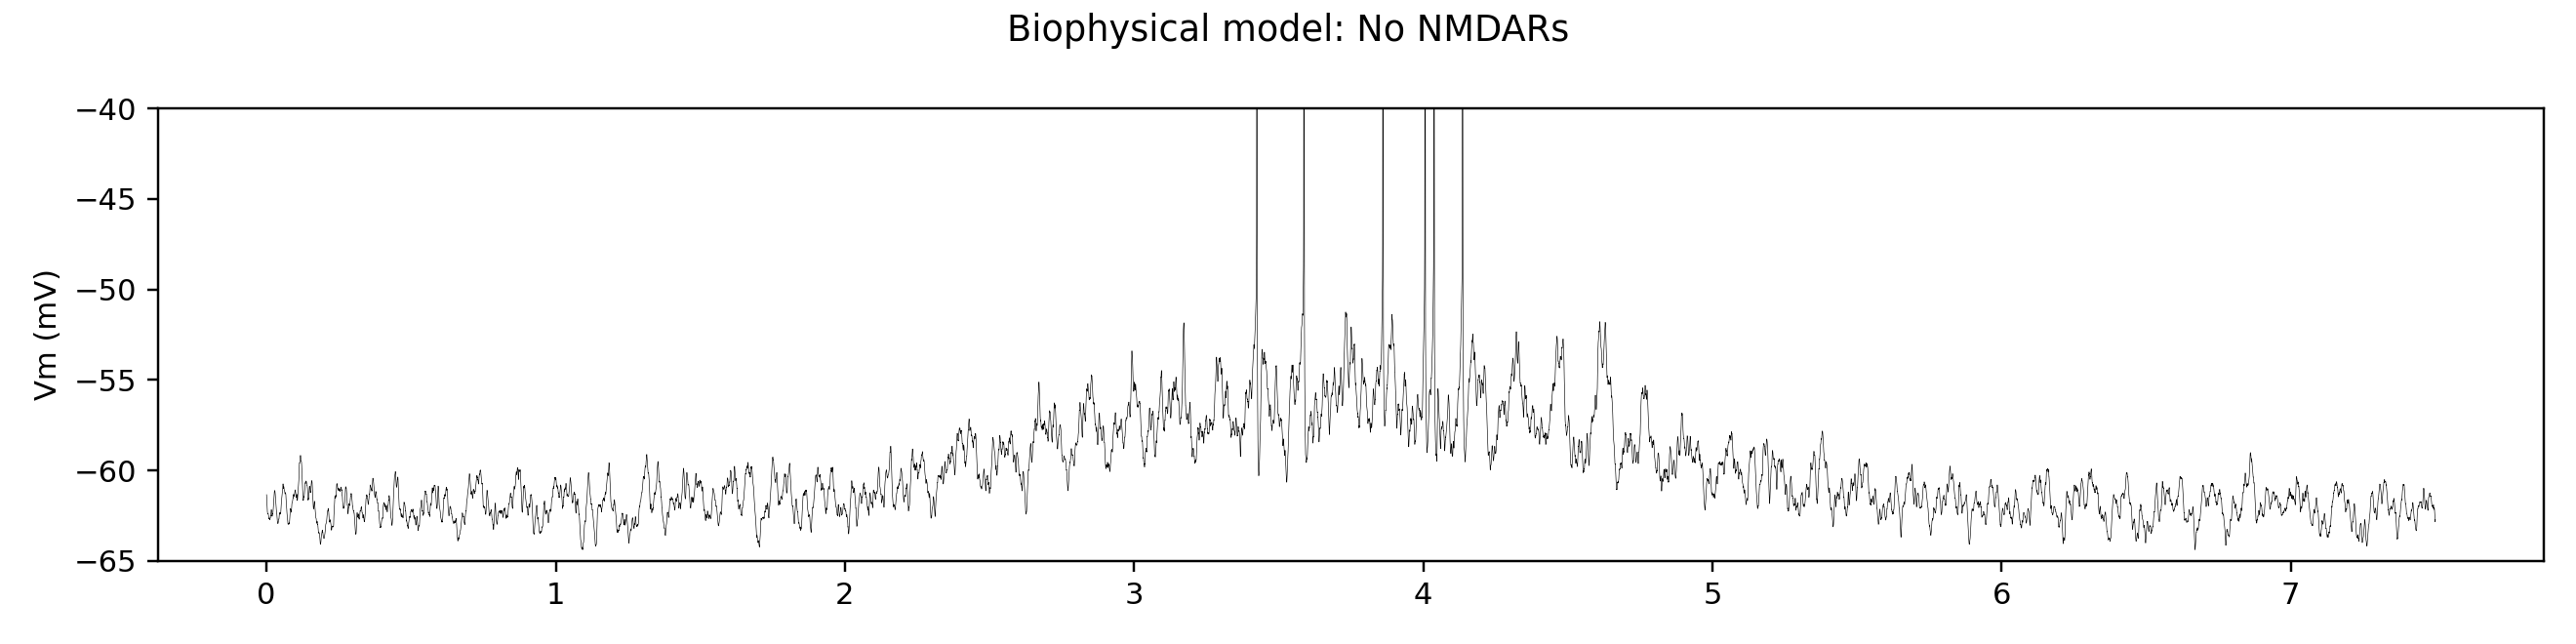

<IPython.core.display.Javascript object>


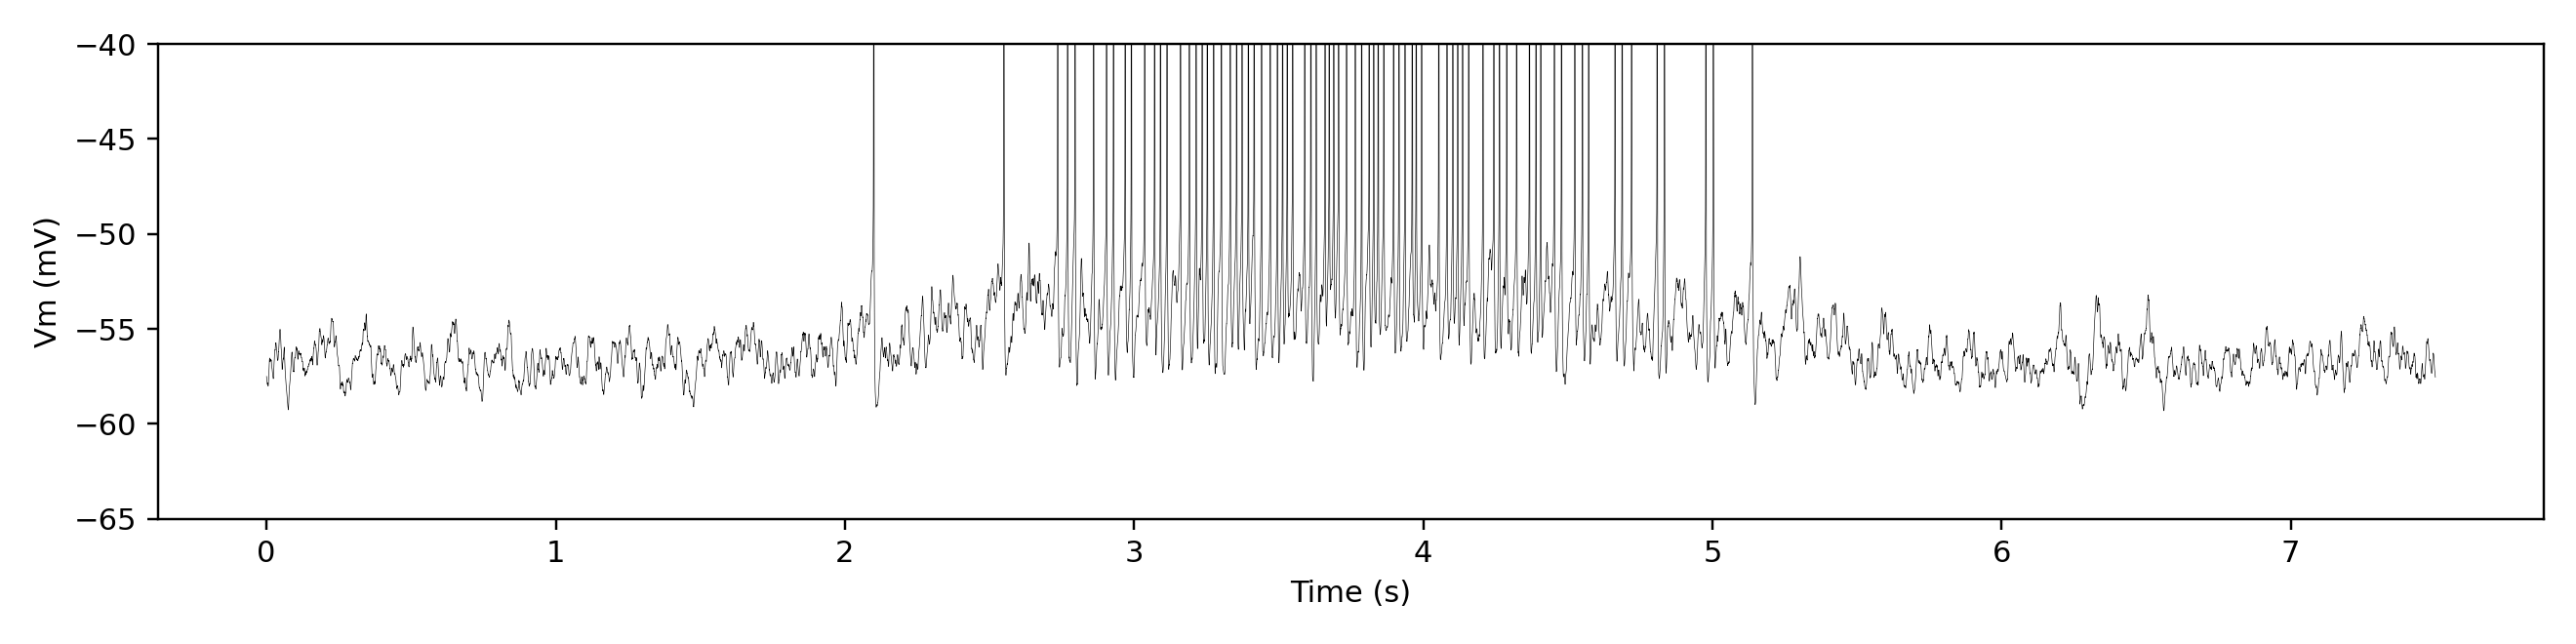

<IPython.core.display.Javascript object>


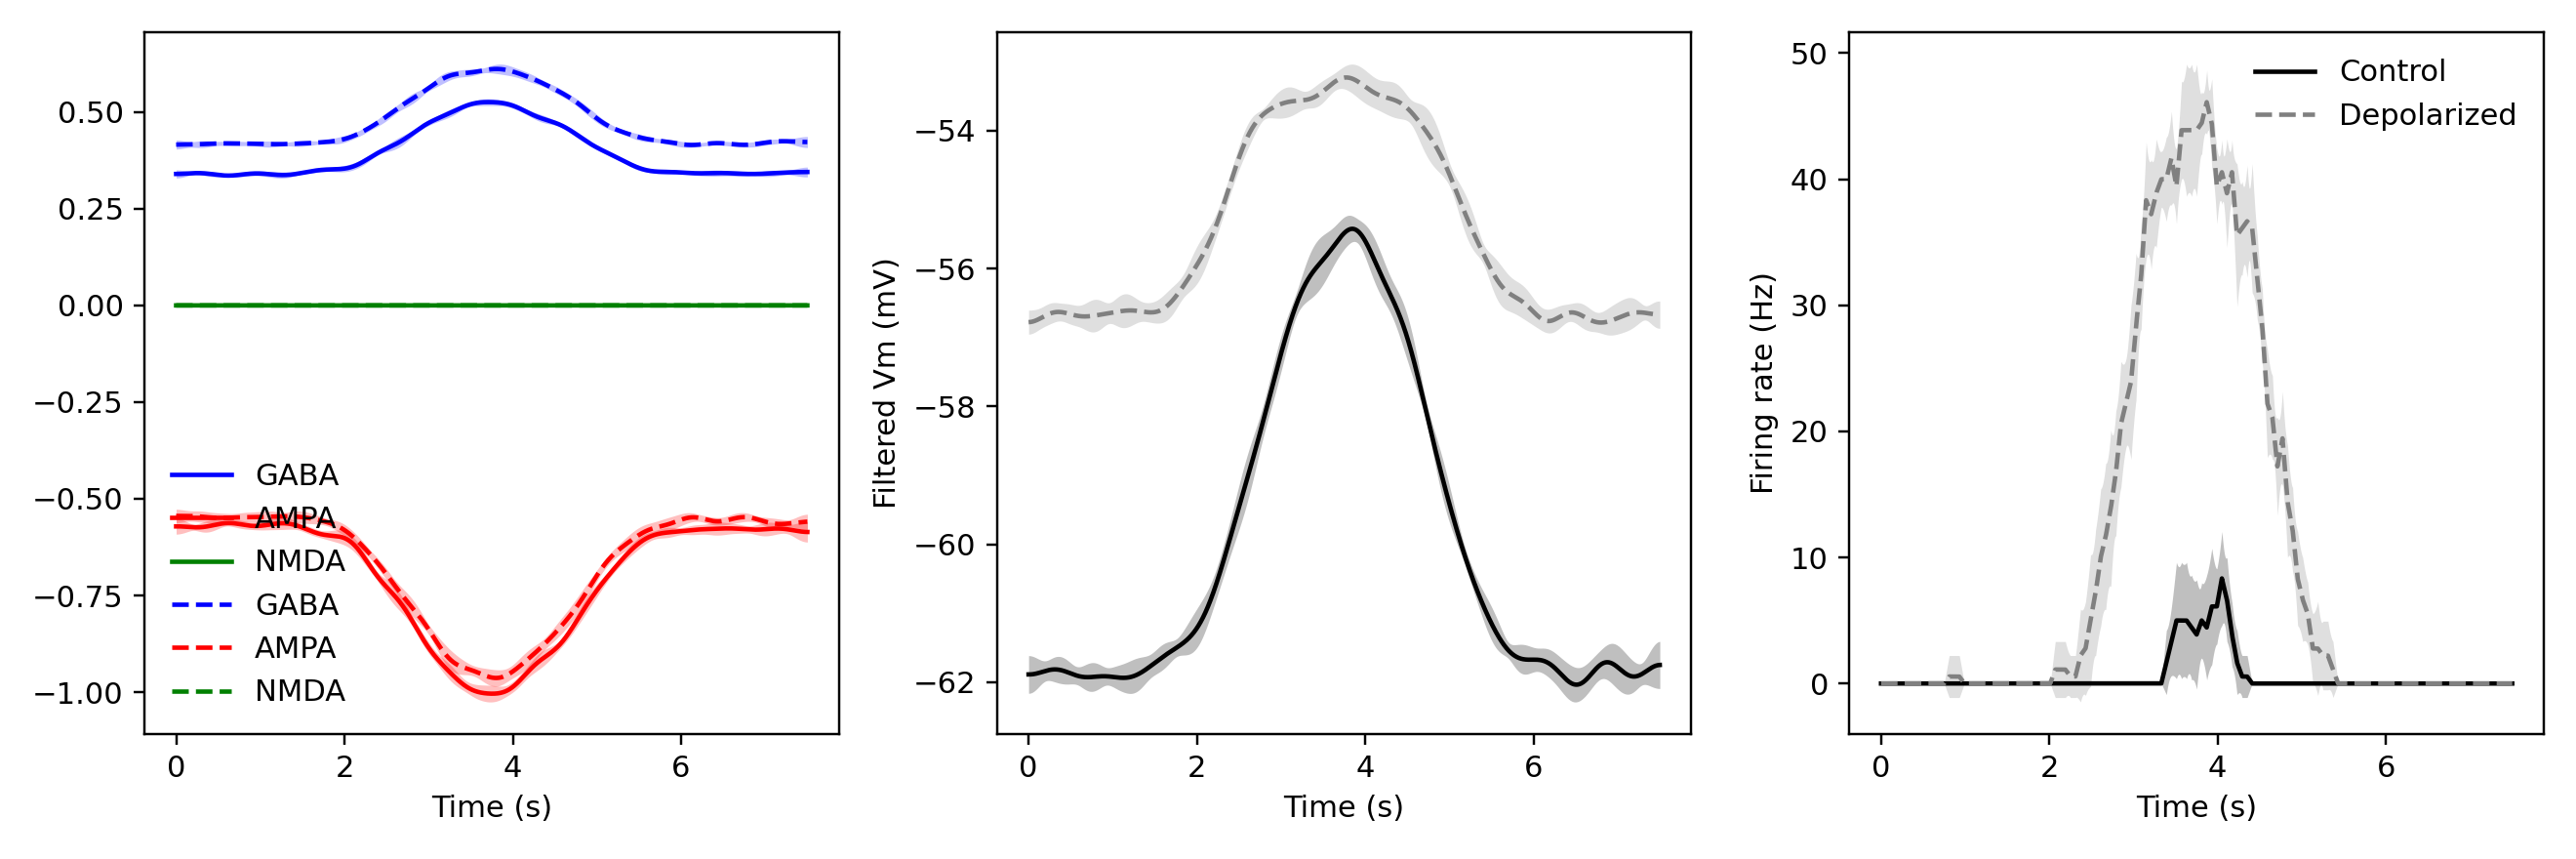

<IPython.core.display.Javascript object>


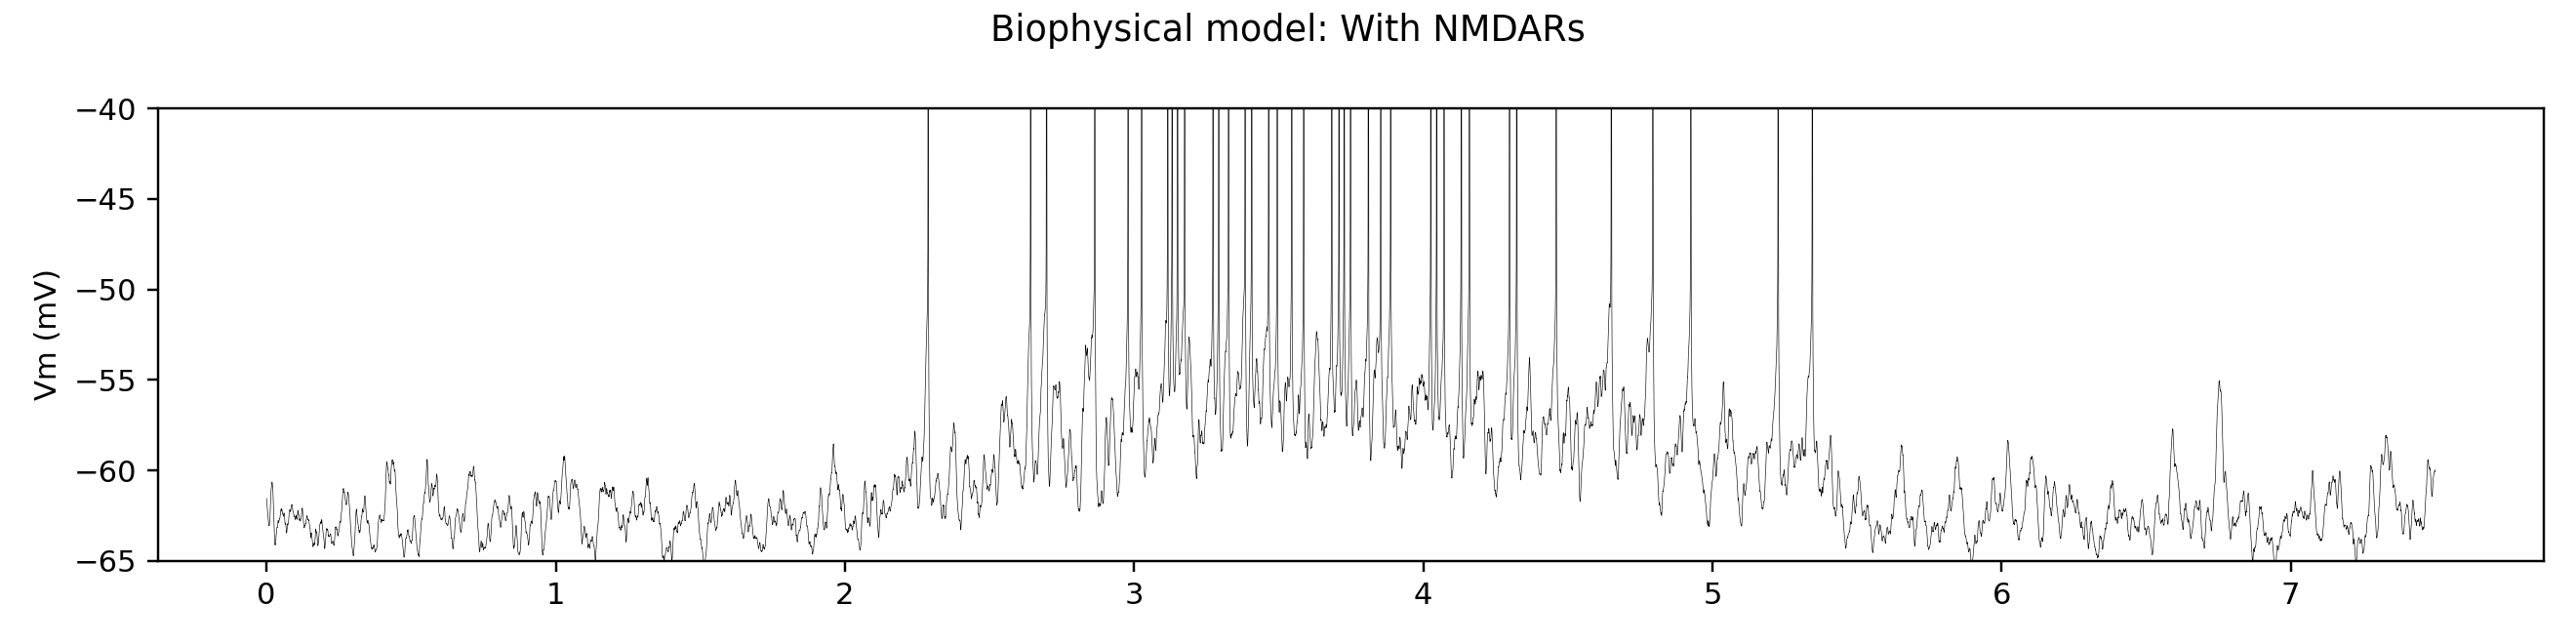

<IPython.core.display.Javascript object>


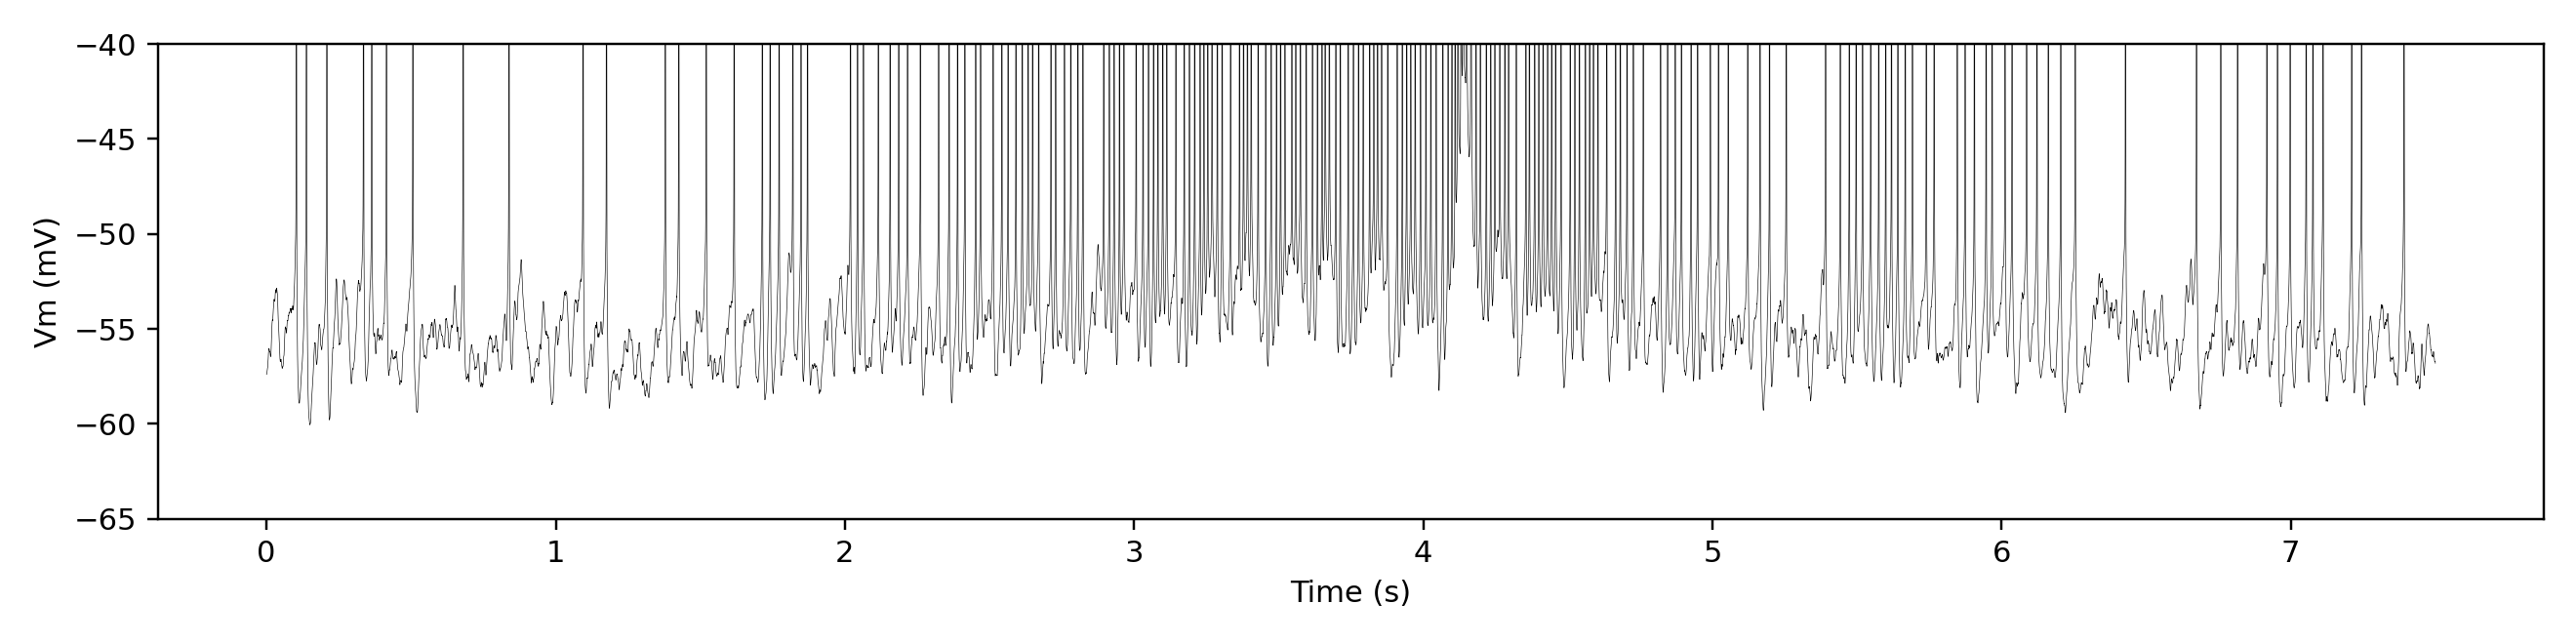

<IPython.core.display.Javascript object>


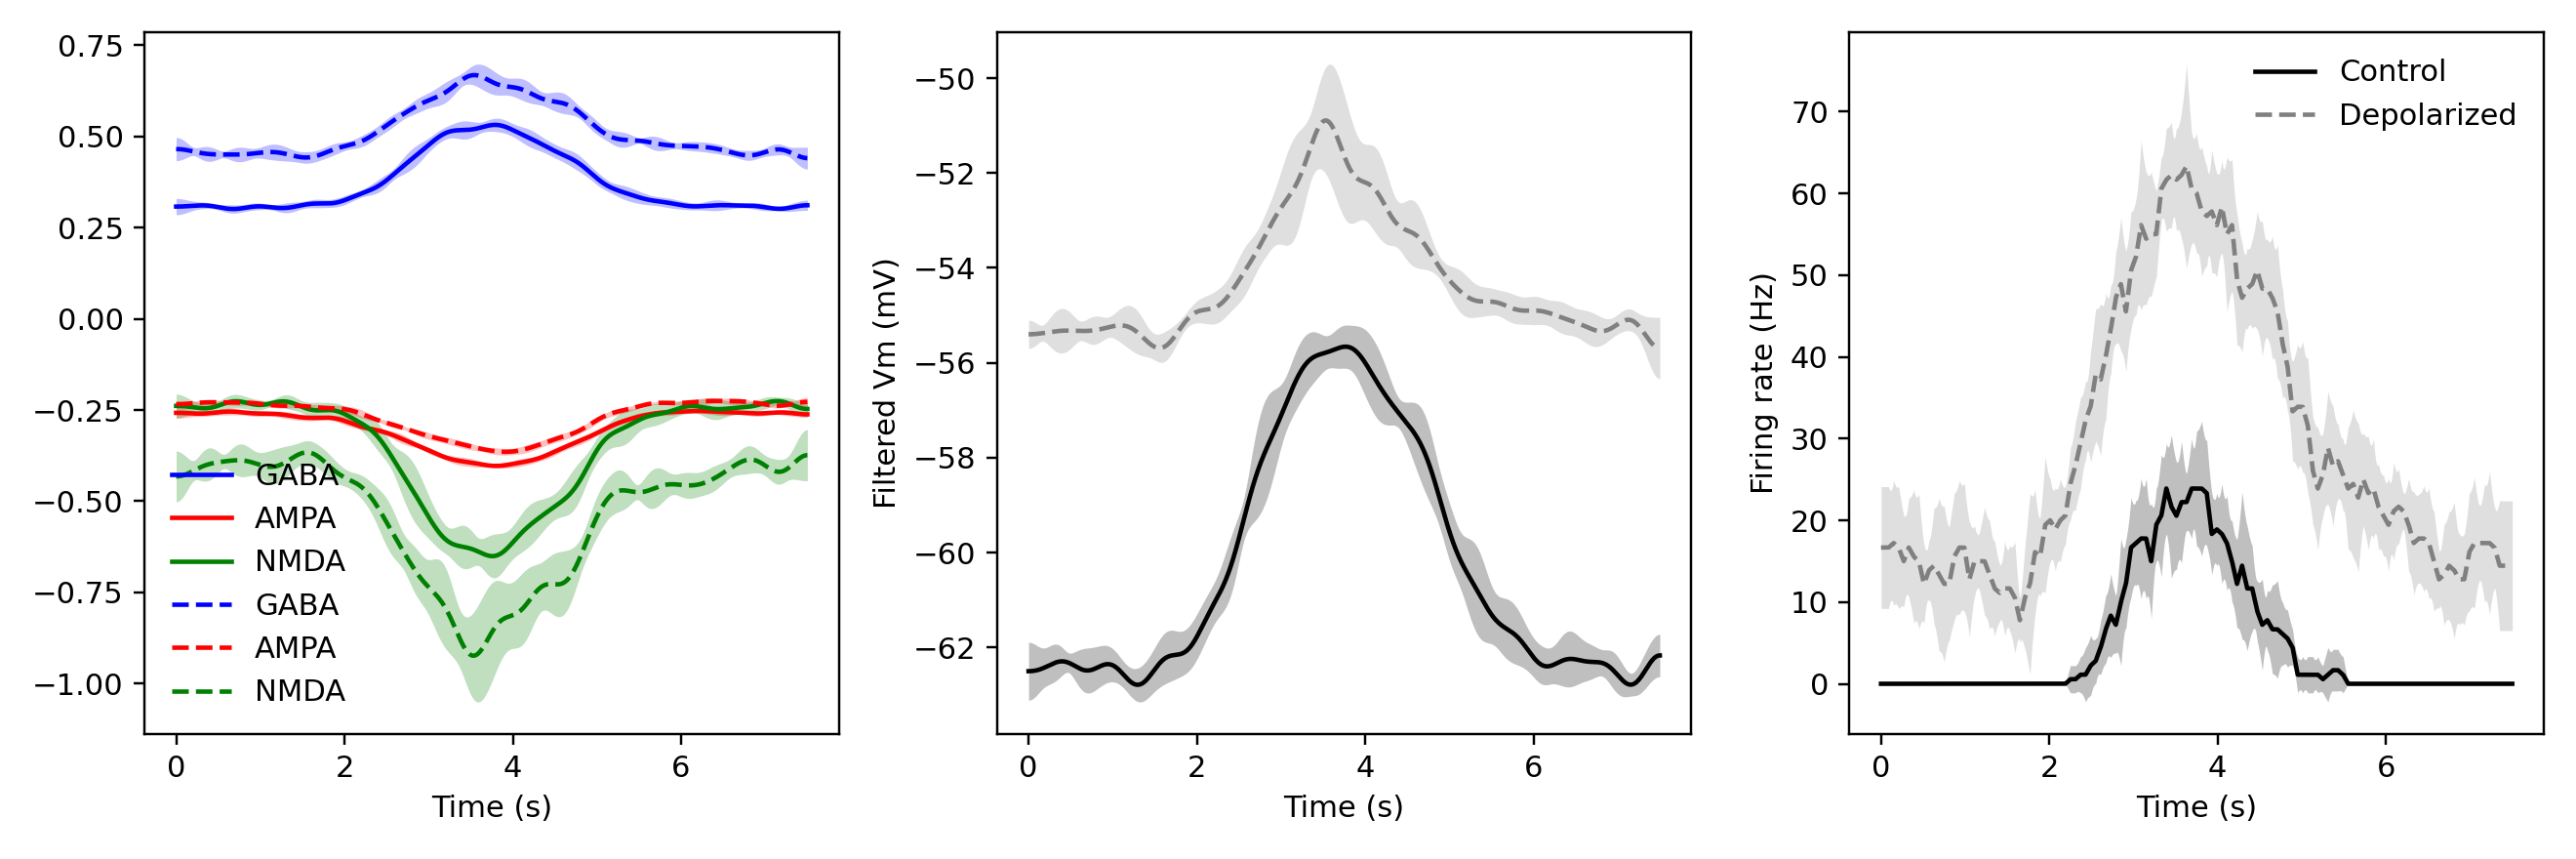

In [27]:
i_syn_labels = {}
i_syn_colors = {'i_AMPA': 'r', 'i_GABA': 'b', 'i_NMDA': 'green'}
for syn_type in i_syn_types:
    i_syn_labels[syn_type] = syn_type.split('i_')[1]


for title, model_names, example_trials, labels in zip(['Biophysical model: No NMDARs', 'Biophysical model: With NMDARs'], [['no_nmda_control', 'no_nmda_depol'], ['nmda_control', 'nmda_depol']], 
                                      [[0, 0], [0, 1]], [['Control', 'Depolarized'], ['Control', 'Depolarized']]):
    figs = [plt.figure(figsize=(12., 3.)) for i in range(2)]
    fig1, axes = plt.subplots(1, 3, figsize=(12., 4.))
    for i, model_name in enumerate(model_names):
        fig = figs[i]
        plt.figure(fig)
        if i == 0:
            plt.suptitle(title)
        plt.plot(rec_t / 1000, vm_traces[model_name][example_trials[i]], linewidth=0.2, c='k')
        plt.ylabel('Vm (mV)')
        plt.ylim((-65, -40))
        if i == 1:
            plt.xlabel('Time (s)')
        fig.tight_layout()
        if i == 0:
            linestyle = '-'
        else:
            linestyle = '--'
        for syn_type in i_syn_types:
            axes[0].plot(rec_t / 1000., i_syn_mean[model_name][syn_type], label=i_syn_labels[syn_type], color=i_syn_colors[syn_type], linestyle=linestyle)
            axes[0].fill_between(rec_t / 1000., i_syn_mean[model_name][syn_type] + i_syn_std[model_name][syn_type], 
                                 i_syn_mean[model_name][syn_type] - i_syn_std[model_name][syn_type], alpha=0.25, linewidth=0, color=i_syn_colors[syn_type])
        if i == 0:
            color = 'k'
        else:
            color = 'grey'
        axes[1].plot(rec_t / 1000., ramp_mean[model_name], linestyle=linestyle, c=color)
        axes[1].fill_between(rec_t / 1000., ramp_mean[model_name] + ramp_std[model_name], ramp_mean[model_name] - ramp_std[model_name], alpha=0.25, linewidth=0, color=color)
        axes[2].plot(stim_t / 1000., firing_rate_mean[model_name], label=labels[i], c=color, linestyle=linestyle)
        axes[2].fill_between(stim_t / 1000., firing_rate_mean[model_name] + firing_rate_std[model_name],
                            firing_rate_mean[model_name] - firing_rate_std[model_name], alpha=0.25, linewidth=0, color=color)
        
    axes[0].set_xlabel('Time (s)')
    axes[1].set_xlabel('Time (s)')
    axes[1].set_ylabel('Filtered Vm (mV)')
    axes[2].set_xlabel('Time (s)')
    axes[2].set_ylabel('Firing rate (Hz)')
    axes[0].legend(loc='best', frameon=False)
    axes[2].legend(loc='best', frameon=False)
    fig1.tight_layout()
    for fig in figs:
        fig.show()
    fig1.show()

In [ ]:
# rec_file_path = 'data/' + rec_filename + '.hdf5'
# with h5py.File(rec_file_path, 'r') as f:
#     print(f['0'].keys())
#     print(list(f['0'].attrs.items()))
#     print(len(f['0']['time'][:]))

In [ ]:
rec_filename = next(iter(rec_filename_dict.values()))
new_rec_t, filtered_i_syn_list_dict = get_patterned_input_filtered_synaptic_currents(rec_filename)

In [ ]:
print(len(rec_t), len(stim_t))

In [ ]:
plt.figure()
for syn_type in filtered_i_syn_list_dict:
    plt.plot(rec_t / 1000., np.mean(filtered_i_syn_list_dict[syn_type], axis=0), label=syn_type)
plt.xlabel('Time (s)')
plt.ylabel('Synaptic current (nA)')
plt.legend(loc='best', frameon=False)
plt.show()

In [ ]:
filtered_i_syn_list_dict[syn_type][0].shape